<a href="https://colab.research.google.com/github/kushagrasharma-13/Artificial_Neural_network/blob/main/ANN_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANN on Breast Cancer Data-set (Keras)

Confusion Matrix

Accuracy, Precision, Recall, F1_score

Classification Report

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
dataset = load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
x = dataset['data']
y = dataset['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
model = Sequential()
model.add(Dense(16,activation="relu", kernel_initializer="uniform"))
model.add(Dropout(rate=0.1))
model.add(Dense(16,activation="relu", kernel_initializer="uniform"))
model.add(Dropout(rate=0.1))
model.add(Dense(1,activation="sigmoid", kernel_initializer="uniform"))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=50, epochs=100)

Epoch 1/100
8/8 [==============================] - 2s 20ms/step - loss: 0.7169 - accuracy: 0.6558
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6701 - accuracy: 0.4121
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6449 - accuracy: 0.4975
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6139 - accuracy: 0.8090
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5812 - accuracy: 0.8317
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5395 - accuracy: 0.8216
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4936 - accuracy: 0.8266
Epoch 8/100
8/8 [==============================] - 0s 12ms/step - loss: 0.4622 - accuracy: 0.8191
Epoch 9/100
8/8 [==============================] - 0s 12ms/step - loss: 0.4002 - accuracy: 0.8668
Epoch 10/100
8/8 [==============================] - 0s 11ms/step - loss: 0.3653 - accuracy: 0.8568
Epoch 11/100
8/8 [====

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                496       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 2ms/step


<Axes: >

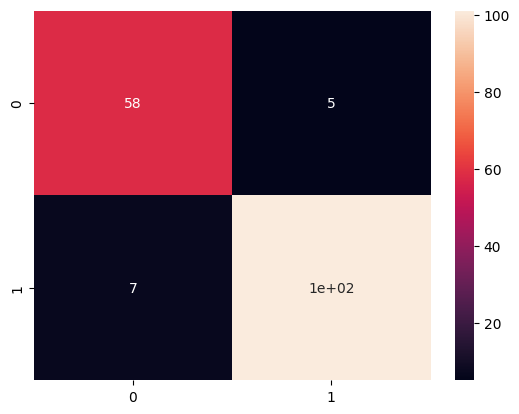

In [ ]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
print("Classification Report: ")
classes = ['0','1']
print(classification_report(y_test, y_pred, target_names = classes))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        63
           1       0.95      0.94      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred)*100))
print("F1_score: {:.2f}%".format(f1_score(y_test, y_pred)*100))

Accuracy: 92.98%
Precision: 95.28%
Recall: 93.52%
F1_score: 94.39%
